Yelp Data Full: https://www.yelp.com/dataset/download

Yelp Data Subset: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset

Austin Coffee Shop: https://www.kaggle.com/datasets/sripaadsrinivasan/yelp-coffee-reviews?resource=download

NY Census Data: https://data.census.gov/table?g=040XX00US36&d=DEC+Demographic+Profile





In [ ]:
!pip install requests pandas numpy matplotlib nltk wordcloud Counter
# !python -m spacy download en_core_web_sm

import requests, pandas as pd, numpy as np, matplotlib, json, nltk
from pandas import json_normalize

  Preparing metadata (setup.py) ... done
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5393 sha256=ccf77351d08943cf59fb7cf49cbc23e1ac8c7fdadebc019ca63a438c0d831b7b
  Stored in directory: /root/.cache/pip/wheels/e3/02/6d/d5c0838427a060718c6060ae4d24da95a0e0df0d7a3dab8040
Successfully built Counter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Specify the path to your JSON file
json_file_path = '/content/drive/MyDrive/AAAAAA/yelp_academic_dataset_review_original.json'

# Read the JSON file line by line and accumulate the data
data = []
with open(json_file_path, 'r') as json_file:
    for line in json_file:
        data.append(json.loads(line))

# Create a DataFrame from the accumulated data
df_reviews = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
3,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4.0,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09
4,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1.0,1,0,0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12


In [ ]:
df_reviews.shape

(364589, 9)

In [ ]:
import csv
import json

# Specify the path to your JSON file
json_file_path = '/content/drive/MyDrive/AAAAAA/yelp_business.json'

data = []
with open(json_file_path, 'r') as json_file:
    for line in json_file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business_dict = df[['business_id', 'name']].set_index('business_id')['name'].to_dict()
# business_dict

In [ ]:
# Create categories_dict by setting business_id as index and converting categories column to a dictionary
categories_dict = df.set_index('business_id')['categories'].to_dict()
# categories_dict

In [ ]:
# Assuming df_reviews is your DataFrame containing review details
# and business_dict is your dictionary mapping business_id to business names

# Map the business_id to business names
df_reviews['business_name'] = df_reviews['business_id'].map(business_dict)

# Map business_id to categories
df_reviews['categories'] = df_reviews['business_id'].map(categories_dict)

# Now df_reviews contains two new columns: 'business_name' and 'categories'
df_reviews.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,business_name,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,"Restaurants, Breakfast & Brunch"
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,The Coventry Deli,"Restaurants, Delis, Salad, Sandwiches"
3,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4.0,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,DoubleTree by Hilton Hotel Philadelphia Center...,"Hotels, Event Planning & Services, Caterers, H..."
4,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1.0,1,0,0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12,El Chicanito Mexican Restaurant,"American (New), Restaurants, Mexican"


In [ ]:
# Keywords to filter by
keywords = ['Coffee', 'Tea', 'Cafe', 'Pastries']
pattern = '|'.join(keywords)

# Filter the DataFrame
coffee_df = df_reviews[df_reviews['categories'].str.contains(pattern, case=False, na=False)]

# Now filtered_df contains only the rows where categories include Coffee, Tea, or Cafe

# Sort the DataFrame by 'business_name' in ascending order
# sorted_coffee_df = coffee_df.sort_values(by='business_name', ascending=True)

# # Display the first few rows of the sorted DataFrame
# sorted_coffee_df.head()

In [ ]:
coffee_df.shape

(49312, 11)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn

# Download necessary NLTK data
nltk.download('wordnet')

# Find hyponyms of 'food.n.02'
food = wn.synset('food.n.02')
food_hyponyms = list(set([w.replace('_', ' ') for s in food.closure(lambda s: s.hyponyms()) for w in s.lemma_names()]))

# Assuming df_reviews is your DataFrame containing the reviews
# Function to check if the review text contains any of the food items
def contains_food_item(text):
    text = text.lower()
    return any(food_item in text for food_item in food_hyponyms)

# Apply the function to filter reviews mentioning specific food items
filtered_reviews = df_reviews[df_reviews['text'].apply(contains_food_item)]

# Segment the filtered reviews based on star ratings
high_star_reviews = filtered_reviews[filtered_reviews['stars'] >= 4]
neutral_star_reviews = filtered_reviews[filtered_reviews['stars'] == 3]
low_star_reviews = filtered_reviews[filtered_reviews['stars'] <= 2]

# Display the first few rows of each segmented DataFrame
print("High Star Reviews:")
high_star_reviews.head(20)

print("\nNeutral Star Reviews:")
neutral_star_reviews.head(20)

print("\nLow Star Reviews:")
low_star_reviews.head(20)


[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('lunch_meat.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('headcheese.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('haslet.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('leg_of_lamb.n.01') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: D

High Star Reviews:

Neutral Star Reviews:

Low Star Reviews:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,business_name,categories
4,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1.0,1,0,0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12,El Chicanito Mexican Restaurant,"American (New), Restaurants, Mexican"
5,yCbzm_d4cHpfUX00Ljvgmg,bHSoye7R5cL-LVWLxtaxMg,SSZDGl2J-CEyIzuIbEiYNQ,2.0,2,0,0,"We started with the artichoke dip, big mistake...",2017-09-08 23:20:19,Caleco's Bar & Grill,"Bars, Nightlife, American (New), Italian, Spor..."
8,pl5AjpEcFxFTltkBvHjsRA,YjS6MDNwGbueb5WtALIJ2A,EBn3U4mpnIRLIy2lKuilRQ,1.0,0,0,0,Been to this location twice and will never go ...,2012-11-06 18:54:49,Logan's Roadhouse,"Restaurants, Nightlife, American (New), Barbeq..."
11,MyGhCZTxjVx9izvW4vIHwg,QJ-ikvhuRcigSCAWJTrnqQ,pSmOH4a3HNNpYM82J5ycLA,2.0,0,0,0,REALLY below average food. Akin to waffle hou...,2015-08-30 14:30:56,The Pancake Pantry,"Restaurants, Sandwiches, Food, Breakfast & Bru..."
13,Zb_27vX8weaYyDn-_2ZhVA,5C_C7bd6rZYgiP4puQxESQ,0Kn5W22UmxOqPj2cjouFNA,1.0,1,1,0,This is an updated review. I've been ordering ...,2015-10-08 04:32:10,Silver Mine Subs,"Restaurants, Sandwiches"
14,9YtDeiEdfrnRj1ykyp7Utw,FP7w-DB7x_cFovMdRbVCNw,JCWwQuH9pEHg-yTj4-D_ow,1.0,5,3,1,"You think Value City, you think cheap value, r...",2012-03-30 05:25:31,Value City Furniture,"Home Decor, Home & Garden, Mattresses, Furnitu..."
16,YQtuP2OsLItDgSyEu5wfHA,m2BVQanoUOrtJc5_GYch2w,lwdkX7KcibM4mDqpDfK7JA,2.0,1,0,0,Had a falafel wrap here a few years ago. Not b...,2017-09-20 16:49:23,Kalamatas - Green Hills,"Caterers, Specialty Food, Mediterranean, Moroc..."
18,-RsFYcZz0HeSrAhu5xDWBg,-cb2SLDoCysQFxbDDf_0pg,Q1HHAb4FzrzfnnrRyA8fgg,2.0,0,0,0,My sister-in-law and I visited this restaurant...,2015-08-30 15:35:41,Cheeseburger in Paradise,"Restaurants, Burgers, Bars, American (Traditio..."
20,82lJQteTxdxQVXfm-RU_tw,av5_rihz1f5DLEIt5NrtNA,9gObo5ltOMo6UgsaXaHPWA,2.0,2,0,0,"Walked into the restaurant, with reservations,...",2013-02-21 22:42:08,R2L,"American (New), Lounges, Nightlife, Cocktail B..."
21,5GNDjFV7Vi7Uganf6OlAbg,7OUAzKZj6LUrQ3G7g7yUSw,S3Kl763P-wKnDLFy0iirqA,2.0,2,2,0,"Let's be honest, this place needs a face lift....",2014-11-30 00:39:26,Gateway Entertainment Centre,"Bars, Leisure Centers, Active Life, Restaurant..."


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Set the display option to show more content in the 'text' column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
print(df.head())
# high_star_reviews[['review_id', 'text', 'mentioned_foods']]

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [ ]:
# Filter the DataFrame based on the presence of specific keywords
keywords = ['coffee', 'tea', 'pastries', 'pastry', 'cafes', 'bakeries', 'Coffee', 'Coffee & Tea', 'Tea', 'Cafe', 'Bakery', "Desserts" ]
pattern = '|'.join(keywords)  # Creates a pattern like 'coffee|tea|pastries|pastry'

coffee_filtered_df = coffee_df[coffee_df['text'].str.contains(pattern, case=False, na=False)]

# Display the filtered DataFrame
coffee_filtered_df.head()

# Filter the DataFrame based on specific category keywords
category_keywords = ['coffee', 'tea', 'pastries', 'pastry', 'cafes', 'bakeries', 'Coffee',
                     'Coffee & Tea', 'Tea', 'Cafe', 'Bakery' ]
pattern = '|'.join(category_keywords)  # Creates a pattern like 'Coffee|Coffee & Tea|Tea|Cafe|Bakery'

# Using str.contains with case-insensitive matching
coffee_filtered_df = coffee_filtered_df[coffee_filtered_df['categories'].str.contains(pattern, case=False, na=False)]


# Define unwanted category keywords
unwanted_categories = ['Steakhouse', 'Wine & Spirits', 'Beer', "Men's Clothing", 'Nightlife', 'Barbeque', 'Mexican', 'Italian', "Home Decor", 'Food Trucks', "Bars", 'Convenience Stores', "Burgers", 'Russian', 'Honduran', 'Hot Dogs', 'Australian', 'Education', 'Popcorn Shops', 'Chicken Shop',
                     "Home & Garden", "Mattresses", "Event Planning", "Furniture", "Tex-Mex", "Chicken Wings", "Nail Salons", "Hair Salons", 'Barbers', "Specialty Schools",'Meat Shops', 'Fast Food', 'Pasta Shops', 'Beaches', 'Soul Food','Pancakes', 'Waffles',
                       'Indian', 'Breweries', 'Greek', 'Brewpubs', 'Cheesesteaks', 'Grocery', 'Turkish','Do-It-Yourself Food', 'Dim Sum', 'French', 'Salad', 'Cafeteria', 'Hawaiian', 'Portuguese', 'Chinese','Cheese Shops', 'Food Stands', 'Diners', 'Fruits & Veggies',
                       "Active Life", "Leisure Centers", "Arts & Entertainment", "Mediterranean", "Doctors", "Traditional Chinese Medicine", "Naturopathic/Holistic", 'Japanese', 'Middle Eastern', 'Canadian (New)', 'Religious Organizations',"Acupuncture", "Health & Medical", "Nutritionists",
                             "Shipping Centers", "Local Services", "Notaries", "Mailbox Centers", "Printing Services",'Street Vendors', 'Olive Oil', 'Amateur Sports Teams', 'Pan Asian', 'Martial Arts', 'Cuban', 'Boxing', 'Izakaya', 'Yelp Events', 'Fish & Chips', 'Custom Cakes', 'African', 'Ethnic Food', 'Gastropubs', 'Pakistani',
                                                 "Department Stores", "Shopping", 'Restaurants',"Fashion", 'Caribbean', 'Kosher', 'Persian/Iranian', 'Empanadas', 'Filipino','British', "Home & Garden",'Brazilian', 'Taiwanese','Venezuelan','Home Services', 'Real Estate','Cajun/Creole', 'Scandinavian',
                       'CSA', 'Canadian (New)','Food Delivery Services', 'Health Markets','Modern European','Buffets','Pop-Up Restaurants','American (Traditional)','American (New)', 'Latin American', 'Poke', 'Delis', 'Belgian', 'Herbs & Spices', 'Wraps','Canadian (New)',
                       'German', 'Southern','Farmers Market','Imported Food', 'American (Traditional)','Ethiopian', "Electronics", 'Candy Stores', 'Spanish', 'Thai', 'American (New)', 'Day Spas', 'Soup', 'Cantonese', 'Trinidadian', 'Seafood', 'Shanghainese','Himalayan/Nepalese','Korean', "Furniture Stores", "Vietnamese", "Pet Adoption", 'Automotive', "Pets", "Pizza", 'Financial Advising', 'Libraries', 'Asian Fusion']

# Create a pattern for unwanted categories
unwanted_pattern = '|'.join(unwanted_categories)  # Pattern like 'Steakhouse|Wine & Spirits|Beer|Men's Clothing'

# Filter out rows with unwanted categories
coffee_filtered_df = coffee_filtered_df[~coffee_filtered_df['categories'].str.contains(unwanted_pattern, case=False, na=False)]

# Display the filtered DataFrame
coffee_filtered_df.head()


<ipython-input-13-c21e4e1655cb>:33: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  coffee_filtered_df = coffee_filtered_df[~coffee_filtered_df['categories'].str.contains(unwanted_pattern, case=False, na=False)]


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,business_name,categories
125,pK4ARMAZINptRcBRgDO77Q,a03-J6zJKNUqWHk1BZyDAw,-yi4ks8BKZ-_xcJYT9WLjQ,5.0,4,0,1,"Nice new place, definitely worth checking out. Cozy, lounge-like atmosphere. It was my first time trying either Kava or Kratom teas, so I wasn't sure what to get, but Paul was great, and explained both very well.",2014-12-18 01:30:58,Hippie Hi,"Local Flavor, Coffee & Tea, Food"
238,7LS61GEv7dh_AqQYMoWIlQ,D5uMny1pAVWhNGDvFDPp8g,Wndkw2PinAwTgjeUJOTdCg,4.0,2,0,2,"Yet another fine hipster coffee shop in Reno! I am telling you kids Reno is the new Portland. They have all the choices you would expect from a third wave coffee shop, beautiful fully manual espresso machines that are intregrated into the counter and are droll worthy in their beauty and function. Chemex and V60 for pour over fans and freaks, a selection of teas that is decent and some really gross versions of ""cronuts"". They also have some blends and concoctions that are good for the fans of the sugary bombs of Starbucks and that ilk.\n\nThe space is pure hipster, simple clean, subway tile and wood, just a handful of tables inside and out and they have free wifi and clean bathrooms. \n\nBaristas are way friendlier than the surly folks in SF and the west coast and the prices are cheaper too than in the usual hipster towns.",2015-09-10 04:49:37,Old World Coffee Lab - Midtown,"Food, Coffee Roasteries, Coffee & Tea"
268,0QrxU2aNrei7ow0avdpm5w,7fDqaGdUMccXQ4bnPwR6yg,p7UGlPkE3Gagm9Mq7aHfYg,4.0,0,0,0,"Smoothie attack! I rarely have smoothies, so it was odd that I was craving one. \n\nTheir recipe is pretty simple yet so delicious and smooth: yogurt, a little fruit juice, frozen fruit and a little honey to sweeten the deal...or some variation of that. The hubby had the strawberry banana and I went with a peachy banana smoothie. Both were delicious, but I liked the peachy banana more, it hit the spot divine! \n\nGreat cafe space with free-wifi!",2011-03-20 05:10:02,The Gelateria Coffee Company,"Food, Coffee & Tea, Ice Cream & Frozen Yogurt, Gelato"
323,zWVmXZzqkplOoml19IlxfQ,N3B5g5ztj6NZ-9BCiJZfgg,8usO-H5uFTzlISfGZN8rSg,2.0,1,0,0,"I was so excited when this place opened a few years back. For some reason, it took me forever to get there to try their stuff. All and all, it's ok. The bagels are not great - do yourself a favor and go the bagel factory about a mile down the road. They have authentic NY style bagels; this place does not.\n\nThe doughnuts are good - not great. Somewhere between Dunkin' Donuts and a true bakery type of taste. If you are going to partake, go with the maple bacon bar...it's the best on the menu.\n\nBottom line from me, no on bagels...meh on doughnuts. I'll probably be back, but would not seek it out.",2015-11-18 21:31:14,Devon Donut & Bagel Company,"Food, Coffee & Tea, Donuts, Bagels"
599,ZoPeBljnWukJrP6dlywCcQ,fyAq5O2XEp7ac656C1iMVw,-kY_HDP7IMvGl-kBIZVU4A,5.0,0,0,0,"this place is pretty much perfect. we go here whenever we are downtown and want to get coffee. the coffee is pretty good. they do espresso. it is verve I've read but they're starting to roast themselves. thats cool. the service and people are nice and the vibe is mellow.\n\nI landed at The French Press once, after being away from Santa Barbara for awhile. I remember sitting at one of their sunny, steel tables outside. Pretty dogs and Santa Barbarans abounded. I sat yesterday on one of their bar seats facing the all-window front, a diorama of Pleasantville spread out before me. Every bit of sunshine and view I took in was assuring me, 'everything is alright, things are good here.' And so it is. I hope The French Press keeps the vibe.",2016-12-20 02:10:26,Dune Coffee Roasters - Anacapa,"Coffee & Tea, Coffee Roasteries, Food"


In [ ]:
# Assuming coffee_filtered_df is your DataFrame and it has a 'categories' column

# Combine all category strings, split them into individual categories, and then get unique categories
all_categories = set(category for category_list in coffee_filtered_df['categories'].str.split(', ') for category in category_list)

# Convert the set to a list
category_list = list(all_categories)

# Display the list of categories
print(category_list)


['Acai Bowls', 'Coffee Roasteries', 'Bakeries', 'Ice Cream & Frozen Yogurt', 'Internet Cafes', 'Food', 'Shaved Ice', 'Specialty Food', 'Macarons', 'Local Flavor', 'Donuts', 'Gelato', 'Tea Rooms', 'Chocolatiers & Shops', 'Patisserie/Cake Shop', 'Bagels', 'Desserts', 'Coffee & Tea Supplies', 'Cupcakes', 'Kombucha', 'Bubble Tea', 'Coffee & Tea']


In [ ]:
coffee_filtered_df.shape

(2919, 11)

In [ ]:
def extract_food_items(text, food_hyponyms):
    text = text.lower()
    return [food_item for food_item in food_hyponyms if food_item in text]



# Extract food items from low star reviews
low_star_reviews['mentioned_foods'] = low_star_reviews['text'].apply(lambda x: extract_food_items(x, food_hyponyms))

# Extract food items from neutral star reviews
neutral_star_reviews['mentioned_foods'] = neutral_star_reviews['text'].apply(lambda x: extract_food_items(x, food_hyponyms))

# Extract food items from high star reviews
high_star_reviews['mentioned_foods'] = high_star_reviews['text'].apply(lambda x: extract_food_items(x, food_hyponyms))



# Display the first few rows of each DataFrame with the extracted food items
print("Low Star Reviews with Mentioned Foods:")
print(low_star_reviews[['review_id', 'mentioned_foods']].head())

print("\nNeutral Star Reviews with Mentioned Foods:")
print(neutral_star_reviews[['review_id', 'mentioned_foods']].head())

print("\nHigh Star Reviews with Mentioned Foods:")
print(high_star_reviews[['review_id', 'mentioned_foods']].head())


<ipython-input-16-bd40c336e27b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_star_reviews['mentioned_foods'] = low_star_reviews['text'].apply(lambda x: extract_food_items(x, food_hyponyms))
<ipython-input-16-bd40c336e27b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_star_reviews['mentioned_foods'] = neutral_star_reviews['text'].apply(lambda x: extract_food_items(x, food_hyponyms))
<ipython-input-16-bd40c336e27b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Low Star Reviews with Mentioned Foods:
                 review_id                                  mentioned_foods
4   TcCcHzc3L6Aboq3DteEfZA          [tomato, hen, rib, side, chips, cheese]
5   yCbzm_d4cHpfUX00Ljvgmg              [hen, tart, artichoke, chips, game]
8   pl5AjpEcFxFTltkBvHjsRA                                      [rib, side]
11  MyGhCZTxjVx9izvW4vIHwg  [tuna, hen, cake, pancake, waffle, date, bacon]
13  Zb_27vX8weaYyDn-_2ZhVA           [bun, side, liver, bread, chili, date]

Neutral Star Reviews with Mentioned Foods:
                 review_id  \
1   saUsX_uimxRlCVr67Z4Jig   
15  IJu7uqPm3fqt80QZuyvi_w   
17  EYtd1U-fzMWpo-zxMuI5Tw   
42  EwCPJIjWnOWw09N7keBtCA   
43  YFp9hHkElfJGvvdo5T9MuA   

                                              mentioned_foods  
1                          [melon, grape, roll, leg, chicken]  
15                                               [tuna, tart]  
17  [green bean, cornbread, green, bread, pork, bean, cheese]  
42            [stick, fr

In [ ]:
coffee_filtered_df.shape

(2919, 11)

In [ ]:
import pandas as pd
import re

# Assuming 'df' is your original DataFrame and 'food_hyponyms' is your list of food items
# Update the function to extract food items, avoiding false positives like 'hen'
def extract_food_items(text, food_hyponyms):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # Extracts individual words
    return [food_item for food_item in food_hyponyms if food_item in words and food_item != 'hen']

# Apply the food extraction function to your DataFrame
coffee_filtered_df['mentioned_foods'] = coffee_filtered_df['text'].apply(lambda x: extract_food_items(x, food_hyponyms))

# Define unwanted food items and filter out their mentions
unwanted_foods = ['beef', 'steak', 'rib', 'eel']
coffee_filtered_df = coffee_filtered_df[~coffee_filtered_df['mentioned_foods'].apply(lambda foods: any(food in foods for food in unwanted_foods))]

# Display the updated DataFrame
coffee_filtered_df.head(20)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,business_name,categories,mentioned_foods
125,pK4ARMAZINptRcBRgDO77Q,a03-J6zJKNUqWHk1BZyDAw,-yi4ks8BKZ-_xcJYT9WLjQ,5.0,4,0,1,"Nice new place, definitely worth checking out. Cozy, lounge-like atmosphere. It was my first time trying either Kava or Kratom teas, so I wasn't sure what to get, but Paul was great, and explained both very well.",2014-12-18 01:30:58,Hippie Hi,"Local Flavor, Coffee & Tea, Food",[]
238,7LS61GEv7dh_AqQYMoWIlQ,D5uMny1pAVWhNGDvFDPp8g,Wndkw2PinAwTgjeUJOTdCg,4.0,2,0,2,"Yet another fine hipster coffee shop in Reno! I am telling you kids Reno is the new Portland. They have all the choices you would expect from a third wave coffee shop, beautiful fully manual espresso machines that are intregrated into the counter and are droll worthy in their beauty and function. Chemex and V60 for pour over fans and freaks, a selection of teas that is decent and some really gross versions of ""cronuts"". They also have some blends and concoctions that are good for the fans of the sugary bombs of Starbucks and that ilk.\n\nThe space is pure hipster, simple clean, subway tile and wood, just a handful of tables inside and out and they have free wifi and clean bathrooms. \n\nBaristas are way friendlier than the surly folks in SF and the west coast and the prices are cheaper too than in the usual hipster towns.",2015-09-10 04:49:37,Old World Coffee Lab - Midtown,"Food, Coffee Roasteries, Coffee & Tea",[]
268,0QrxU2aNrei7ow0avdpm5w,7fDqaGdUMccXQ4bnPwR6yg,p7UGlPkE3Gagm9Mq7aHfYg,4.0,0,0,0,"Smoothie attack! I rarely have smoothies, so it was odd that I was craving one. \n\nTheir recipe is pretty simple yet so delicious and smooth: yogurt, a little fruit juice, frozen fruit and a little honey to sweeten the deal...or some variation of that. The hubby had the strawberry banana and I went with a peachy banana smoothie. Both were delicious, but I liked the peachy banana more, it hit the spot divine! \n\nGreat cafe space with free-wifi!",2011-03-20 05:10:02,The Gelateria Coffee Company,"Food, Coffee & Tea, Ice Cream & Frozen Yogurt, Gelato","[strawberry, banana, yogurt]"
323,zWVmXZzqkplOoml19IlxfQ,N3B5g5ztj6NZ-9BCiJZfgg,8usO-H5uFTzlISfGZN8rSg,2.0,1,0,0,"I was so excited when this place opened a few years back. For some reason, it took me forever to get there to try their stuff. All and all, it's ok. The bagels are not great - do yourself a favor and go the bagel factory about a mile down the road. They have authentic NY style bagels; this place does not.\n\nThe doughnuts are good - not great. Somewhere between Dunkin' Donuts and a true bakery type of taste. If you are going to partake, go with the maple bacon bar...it's the best on the menu.\n\nBottom line from me, no on bagels...meh on doughnuts. I'll probably be back, but would not seek it out.",2015-11-18 21:31:14,Devon Donut & Bagel Company,"Food, Coffee & Tea, Donuts, Bagels","[bagel, bacon]"
599,ZoPeBljnWukJrP6dlywCcQ,fyAq5O2XEp7ac656C1iMVw,-kY_HDP7IMvGl-kBIZVU4A,5.0,0,0,0,"this place is pretty much perfect. we go here whenever we are downtown and want to get coffee. the coffee is pretty good. they do espresso. it is verve I've read but they're starting to roast themselves. thats cool. the service and people are nice and the vibe is mellow.\n\nI landed at The French Press once, after being away from Santa Barbara for awhile. I remember sitting at one of their sunny, steel tables outside. Pretty dogs and Santa Barbarans abounded. I sat yesterday on one of their bar seats facing the all-window front, a diorama of Pleasantville spread out before me. Every bit of sunshine and view I took in was assuring me, 'everything is alright, things are good here.' And so it is. I hope The French Press keeps the vibe.",2016-12-20 02:10:26,Dune Coffee Roasters - Anacapa,"Coffee & Tea, Coffee Roasteries, Food",[roast]
723,968NZy-u7tFotfjQ07R_Lw,o3Xs5Sm_jZiRJam0ucjUhQ,p7UGlPkE3Gagm9Mq7aHfYg,4.0,0,0,0,"This is my neighborhood gelateria. It i

In [ ]:
from collections import Counter

# Extract mentioned foods for each star rating category
high_star_mentioned_foods = Counter([food for foods_list in high_star_reviews['mentioned_foods'] for food in foods_list])
neutral_star_mentioned_foods = Counter([food for foods_list in neutral_star_reviews['mentioned_foods'] for food in foods_list])
low_star_mentioned_foods = Counter([food for foods_list in low_star_reviews['mentioned_foods'] for food in foods_list])
# Get top 10 foods for high, neutral, and low star reviews
top_10_high_star_foods = high_star_mentioned_foods.most_common(20)
top_10_neutral_star_foods = neutral_star_mentioned_foods.most_common(20)
top_10_low_star_foods = low_star_mentioned_foods.most_common(20)

# Display the results
print("Top 10 Foods in High Star Reviews:", top_10_high_star_foods)
print("\nTop 10 Foods in Neutral Star Reviews:", top_10_neutral_star_foods)
print("\nTop 10 Foods in Low Star Reviews:", top_10_low_star_foods)



Top 10 Foods in High Star Reviews: [('hen', 77657), ('side', 50446), ('round', 27891), ('chicken', 27528), ('cheese', 26557), ('eel', 24260), ('tart', 19237), ('meat', 16526), ('bread', 16460), ('veg', 16044), ('cut', 14951), ('pea', 14754), ('pie', 13884), ('cake', 12932), ('roll', 12916), ('fish', 12719), ('fries', 12642), ('cos', 12537), ('shrimp', 12140), ('date', 11403)]

Top 10 Foods in Neutral Star Reviews: [('hen', 16706), ('side', 11046), ('round', 5751), ('chicken', 5713), ('cheese', 5232), ('eel', 4698), ('meat', 3619), ('bread', 3491), ('rib', 3448), ('tart', 3409), ('pea', 3289), ('fries', 3187), ('cut', 2821), ('cos', 2808), ('veg', 2790), ('pie', 2725), ('tuna', 2650), ('fish', 2592), ('roll', 2551), ('steak', 2377)]

Top 10 Foods in Low Star Reviews: [('hen', 46369), ('side', 16982), ('rib', 15166), ('round', 11794), ('tart', 8765), ('pea', 8758), ('eel', 7851), ('chicken', 7318), ('cheese', 6719), ('cos', 6059), ('pie', 5441), ('cut', 5270), ('tuna', 5219), ('date', 48

In [ ]:
import re

def extract_food_items(text, food_hyponyms):
    text = text.lower()
    food_items = []
    for food_item in food_hyponyms:
        if re.search(r'\b' + re.escape(food_item) + r'\b', text):
            food_items.append(food_item)
    return food_items
# Reapply the extraction with the updated function
coffee_filtered_df['mentioned_foods'] = coffee_filtered_df['text'].apply(lambda x: extract_food_items(x, food_hyponyms))

# Re-segment the DataFrame
high_star_reviews = coffee_filtered_df[coffee_filtered_df['stars'] >= 4]
neutral_star_reviews = coffee_filtered_df[coffee_filtered_df['stars'] == 3]
low_star_reviews = coffee_filtered_df[coffee_filtered_df['stars'] <= 2]

# Re-aggregate mentioned foods
high_star_mentioned_foods = Counter([food for foods_list in high_star_reviews['mentioned_foods'] for food in foods_list])
neutral_star_mentioned_foods = Counter([food for foods_list in neutral_star_reviews['mentioned_foods'] for food in foods_list])
low_star_mentioned_foods = Counter([food for foods_list in low_star_reviews['mentioned_foods'] for food in foods_list])

# Get top 10 foods again
top_20_high_star_foods = high_star_mentioned_foods.most_common(20)
top_20_neutral_star_foods = neutral_star_mentioned_foods.most_common(20)
top_20_low_star_foods = low_star_mentioned_foods.most_common(20)
print("Top 20 Foods in High Star Reviews:", top_20_high_star_foods)
print("\nTop 20 Foods in Neutral Star Reviews:", top_20_neutral_star_foods)
print("\nTop 20 Foods in Low Star Reviews:", top_20_low_star_foods)


Top 20 Foods in High Star Reviews: [('chocolate', 195), ('cheese', 95), ('green', 94), ('side', 94), ('baked goods', 84), ('cake', 83), ('pastry', 75), ('croissant', 70), ('roast', 66), ('bean', 59), ('coconut', 58), ('donut', 57), ('gem', 50), ('cookie', 47), ('bagel', 46), ('butter', 45), ('bread', 43), ('date', 39), ('strawberry', 37), ('muffin', 37)]

Top 20 Foods in Neutral Star Reviews: [('side', 19), ('chocolate', 18), ('cake', 17), ('cheese', 12), ('green', 12), ('pastry', 11), ('donut', 11), ('stick', 10), ('bagel', 10), ('baked goods', 10), ('cut', 8), ('blueberry', 7), ('strawberry', 7), ('croissant', 7), ('roast', 6), ('cream cheese', 5), ('mango', 5), ('pumpkin', 5), ('apple', 5), ('bread', 4)]

Top 20 Foods in Low Star Reviews: [('donut', 30), ('chocolate', 24), ('cheese', 24), ('bagel', 21), ('side', 18), ('pastry', 14), ('cake', 13), ('cream cheese', 11), ('green', 11), ('bacon', 9), ('pumpkin', 8), ('doughnut', 8), ('soy', 7), ('raspberry', 7), ('coconut', 7), ('bread'

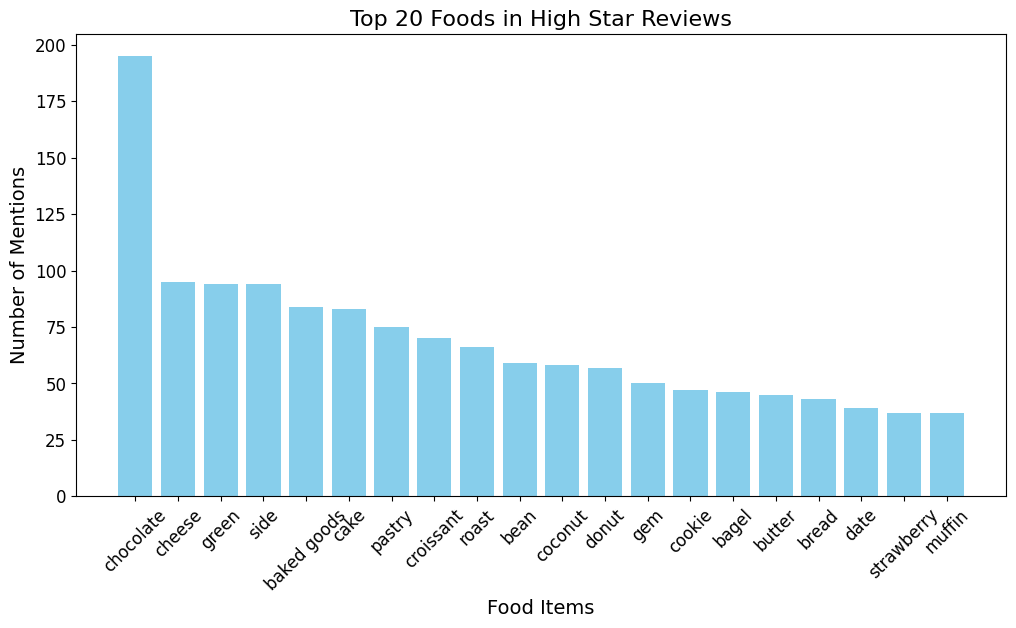

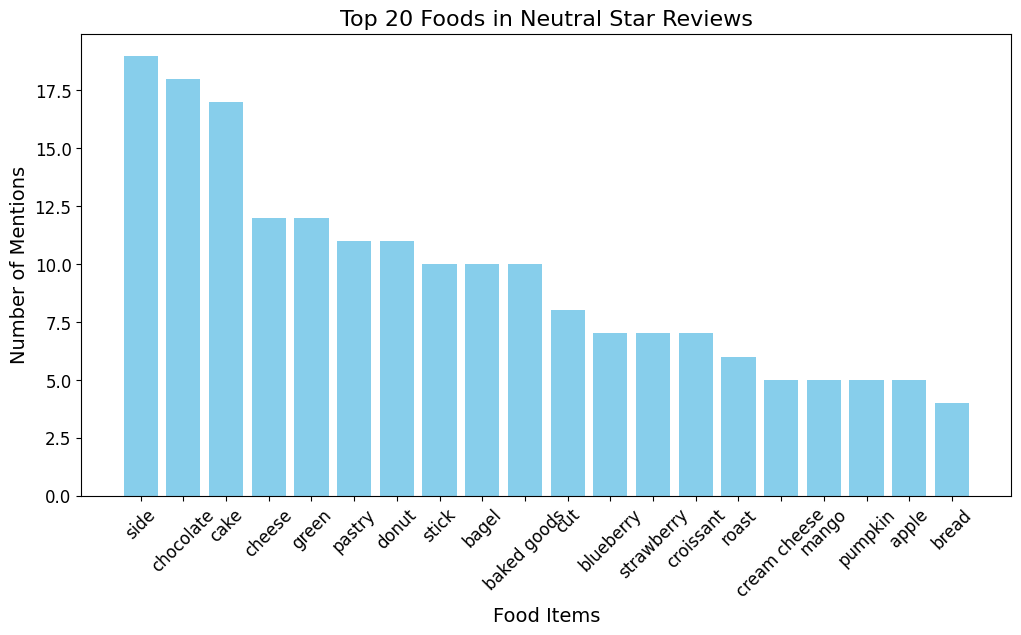

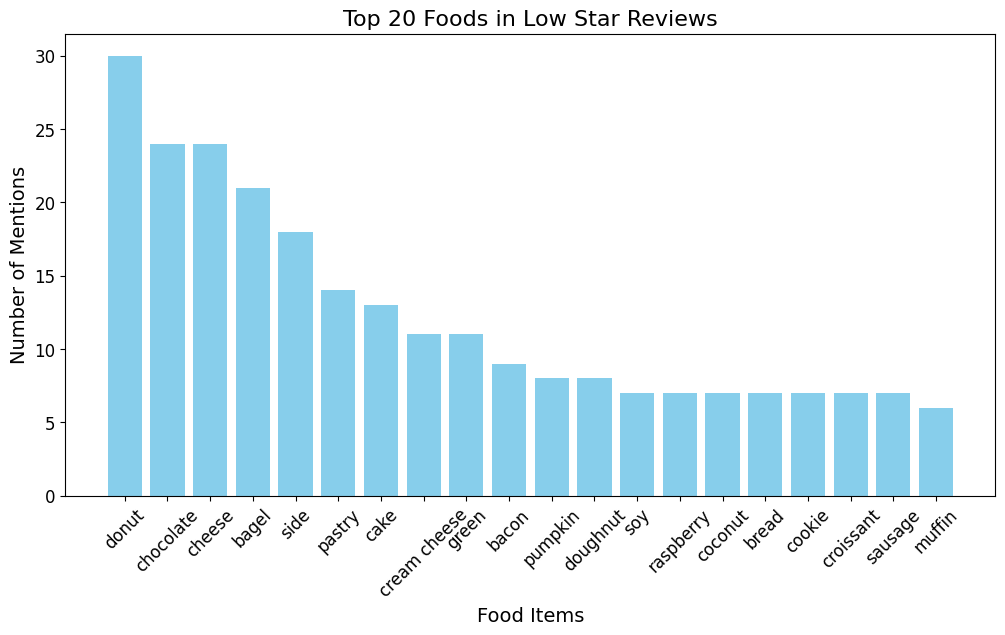

In [ ]:
import matplotlib.pyplot as plt

def plot_top_mentioned_foods(food_counts, title, num_top_items=20):
    top_items = food_counts.most_common(num_top_items)
    items, counts = zip(*top_items)

    plt.figure(figsize=(12, 6))
    plt.bar(items, counts, color='skyblue')
    plt.xlabel('Food Items', fontsize=14)
    plt.ylabel('Number of Mentions', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plotting the top foods for high star reviews
plot_top_mentioned_foods(high_star_mentioned_foods, 'Top 20 Foods in High Star Reviews')

# Plotting the top foods for neutral star reviews
plot_top_mentioned_foods(neutral_star_mentioned_foods, 'Top 20 Foods in Neutral Star Reviews')

# Plotting the top foods for low star reviews
plot_top_mentioned_foods(low_star_mentioned_foods, 'Top 20 Foods in Low Star Reviews')


In [ ]:
import pandas as pd
import nltk
from nltk.util import bigrams, trigrams
from nltk.tokenize import word_tokenize

# Make sure to download the required NLTK data
nltk.download('punkt')

# Tokenize the text
coffee_filtered_df['tokenized'] = coffee_filtered_df['text'].apply(word_tokenize)

# Create bigrams and trigrams
coffee_filtered_df['bigrams'] = coffee_filtered_df['tokenized'].apply(lambda row: list(bigrams(row)))
coffee_filtered_df['trigrams'] = coffee_filtered_df['tokenized'].apply(lambda row: list(trigrams(row)))

# Display the results
print(coffee_filtered_df[['bigrams', 'trigrams']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-23-6b2d178eaec5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['bigrams'], positive_reviews['trigrams'] = zip(*positive_reviews['text'].apply(get_ngrams))
<ipython-input-23-6b2d178eaec5>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_reviews['

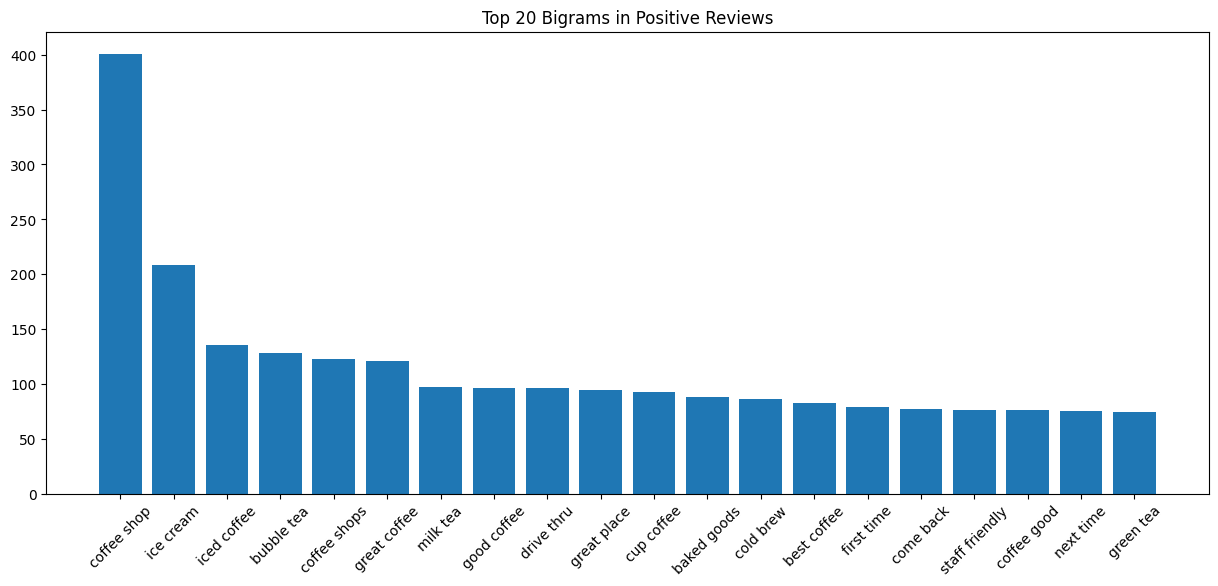

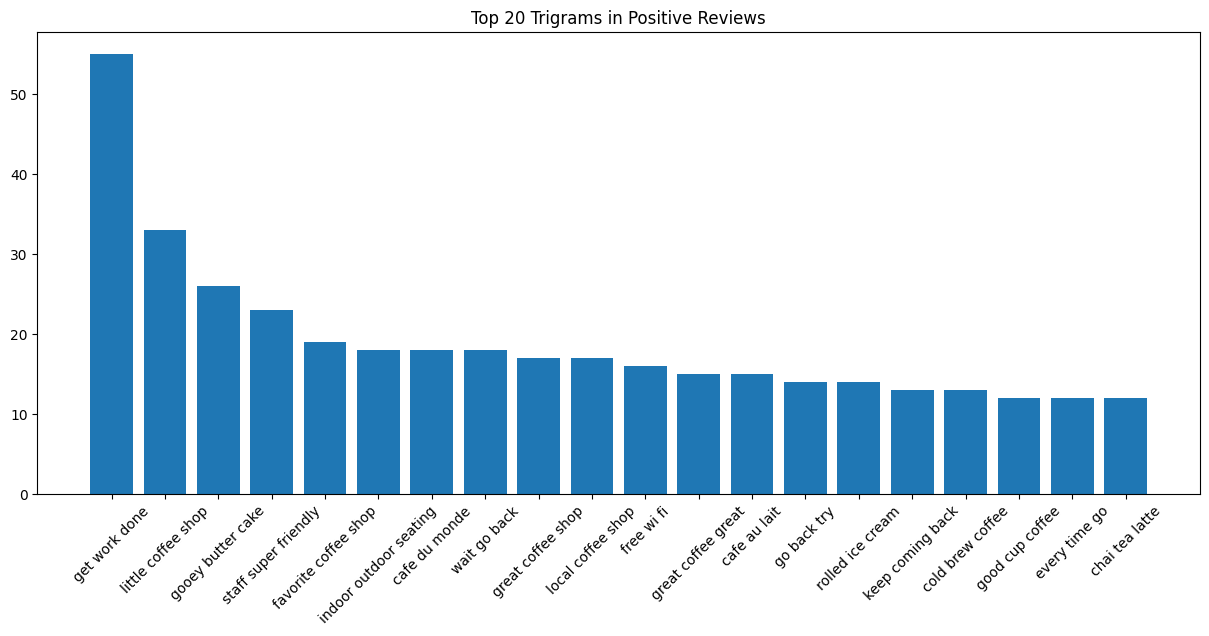

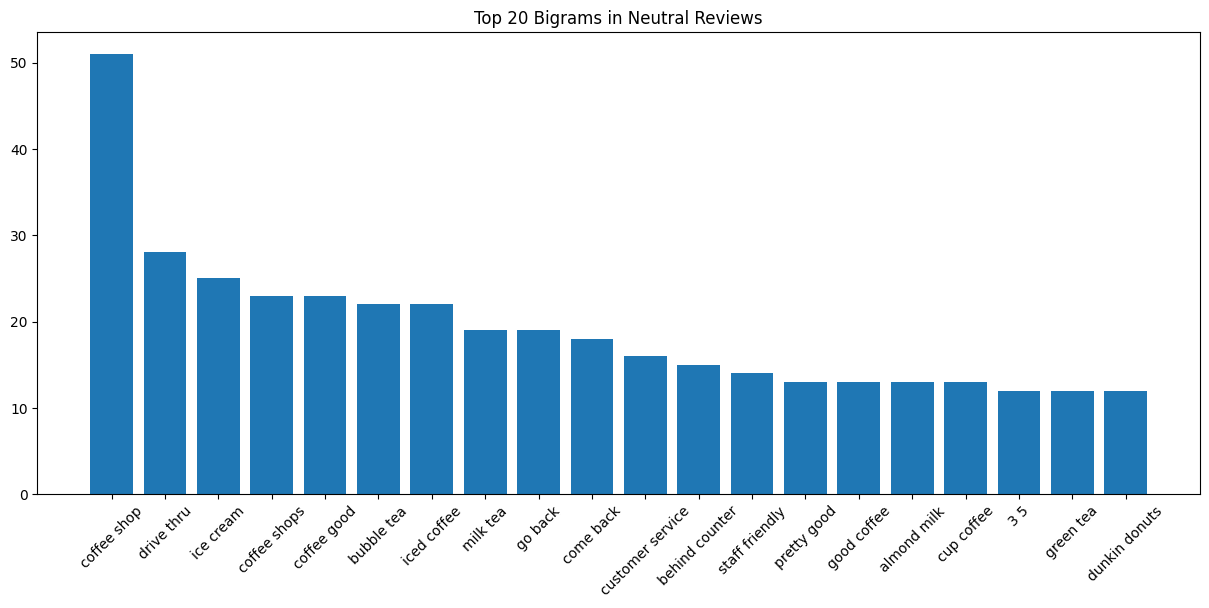

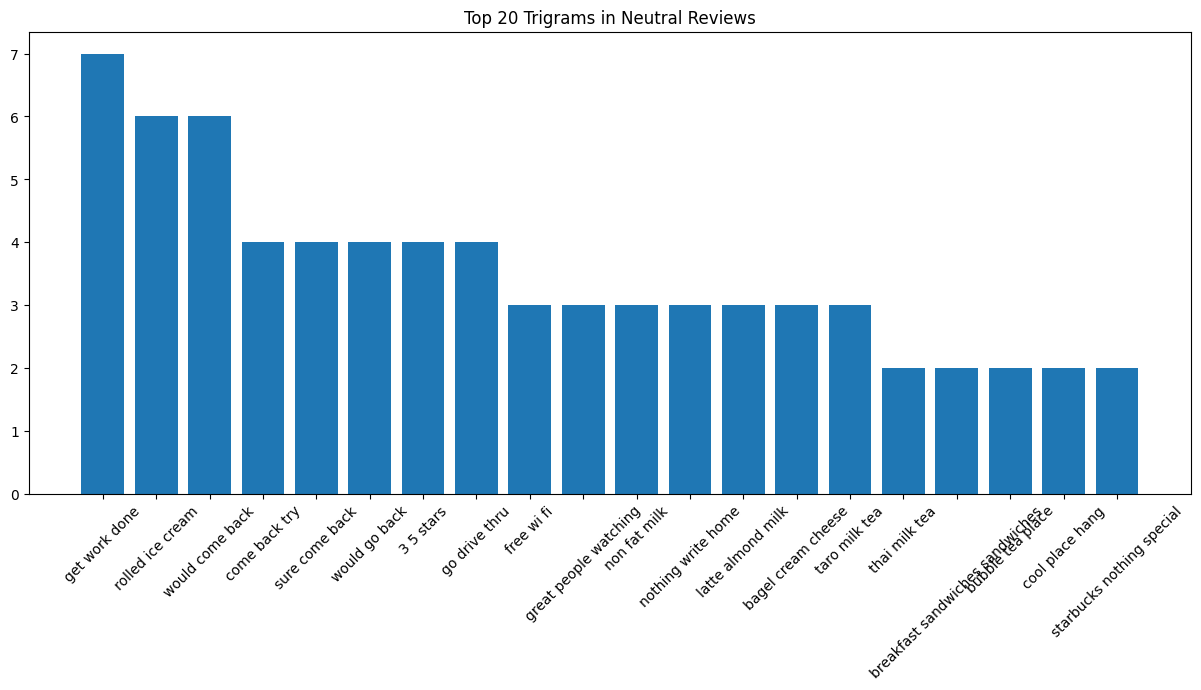

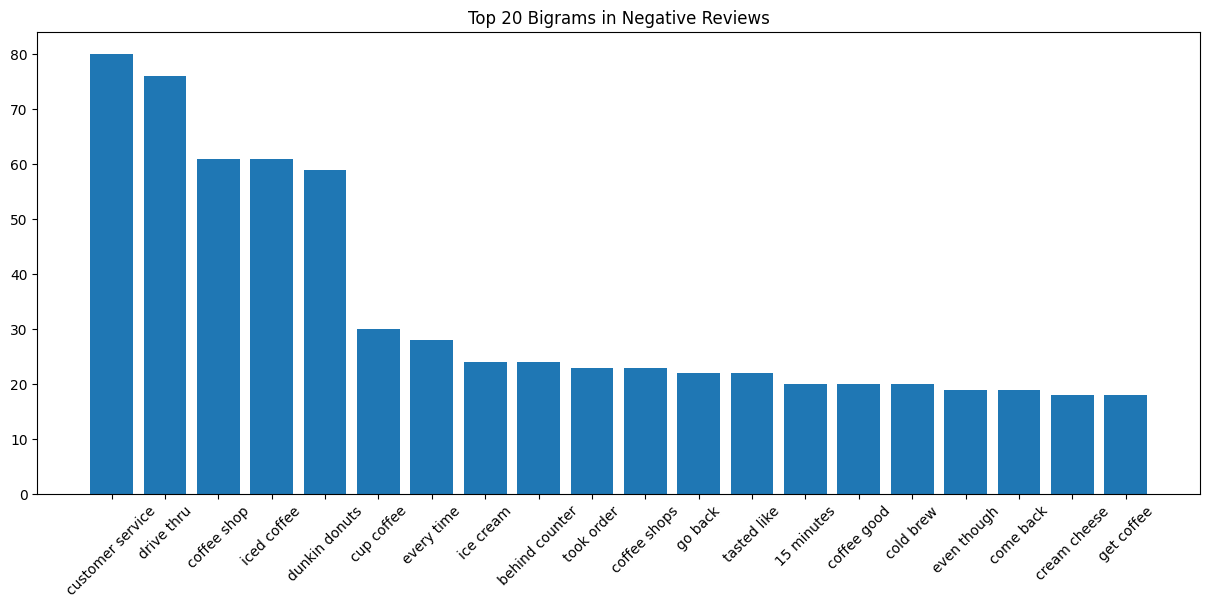

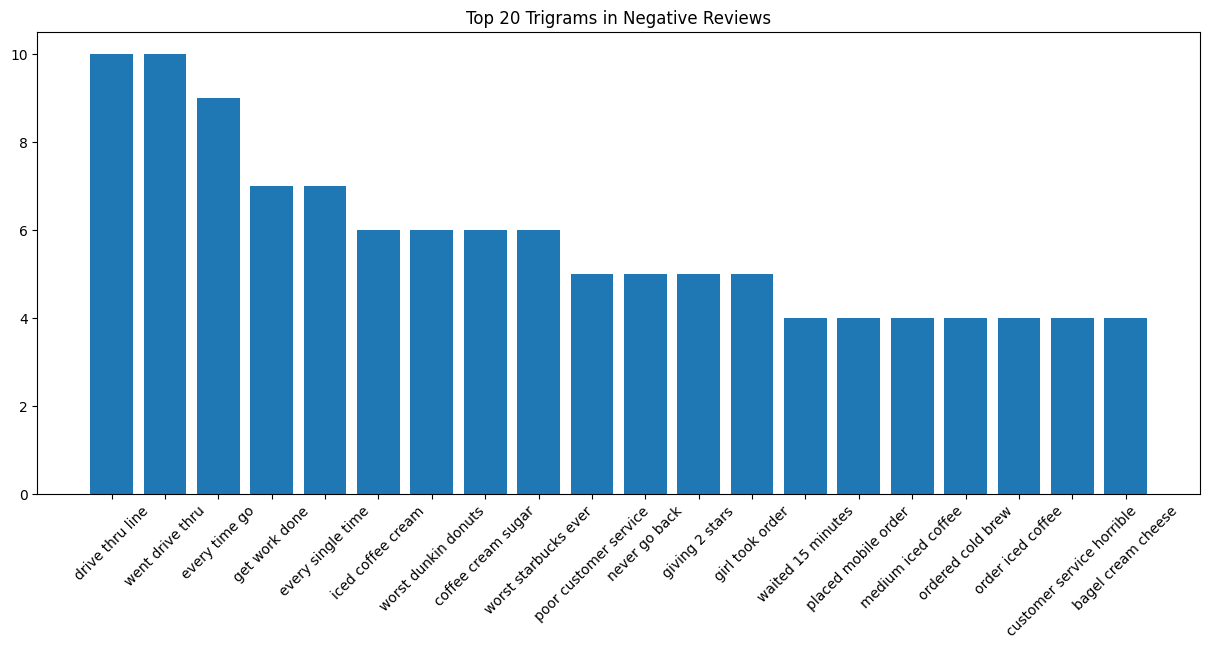

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize a tokenizer that removes punctuation and stop words
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

# Function to tokenize text and extract n-grams, excluding stop words
def get_ngrams(text):
    tokens = [word for word in tokenizer.tokenize(text.lower()) if word not in stop_words]
    return list(bigrams(tokens)), list(trigrams(tokens))

# [Assuming your DataFrame 'coffee_filtered_df' is already defined with 'stars' and 'text' columns]

# Categorize reviews
coffee_filtered_df['review_type'] = pd.cut(coffee_filtered_df['stars'], bins=[0, 2, 3, 5], include_lowest=True, labels=['negative', 'neutral', 'positive'])

# Split DataFrame based on review type
positive_reviews = coffee_filtered_df[coffee_filtered_df['review_type'] == 'positive']
neutral_reviews = coffee_filtered_df[coffee_filtered_df['review_type'] == 'neutral']
negative_reviews = coffee_filtered_df[coffee_filtered_df['review_type'] == 'negative']

# Generate n-grams for each review type
positive_reviews['bigrams'], positive_reviews['trigrams'] = zip(*positive_reviews['text'].apply(get_ngrams))
neutral_reviews['bigrams'], neutral_reviews['trigrams'] = zip(*neutral_reviews['text'].apply(get_ngrams))
negative_reviews['bigrams'], negative_reviews['trigrams'] = zip(*negative_reviews['text'].apply(get_ngrams))

# Function to plot most common n-grams
def plot_ngrams(ngrams_list, title, n=20):
    plt.figure(figsize=(15, 6))  # Set the figure size
    ngram_counts = Counter(ngrams_list)
    common_ngrams = ngram_counts.most_common(n)
    ngrams, counts = zip(*common_ngrams)
    plt.bar(range(n), counts, tick_label=[' '.join(ng) for ng in ngrams])
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Flatten the list of n-grams and plot for each review type
plot_ngrams([bg for bgs in positive_reviews['bigrams'] for bg in bgs], 'Top 20 Bigrams in Positive Reviews')
plot_ngrams([tg for tgs in positive_reviews['trigrams'] for tg in tgs], 'Top 20 Trigrams in Positive Reviews')
plot_ngrams([bg for bgs in neutral_reviews['bigrams'] for bg in bgs], 'Top 20 Bigrams in Neutral Reviews')
plot_ngrams([tg for tgs in neutral_reviews['trigrams'] for tg in tgs], 'Top 20 Trigrams in Neutral Reviews')
plot_ngrams([bg for bgs in negative_reviews['bigrams'] for bg in bgs], 'Top 20 Bigrams in Negative Reviews')
plot_ngrams([tg for tgs in negative_reviews['trigrams'] for tg in tgs], 'Top 20 Trigrams in Negative Reviews')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-24-a9bd57ce50ed>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['bigrams'], positive_reviews['trigrams'], positive_reviews['quadgrams'] = zip(*positive_reviews['text'].apply(get_ngrams))
<ipython-input-24-a9bd57ce50ed>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

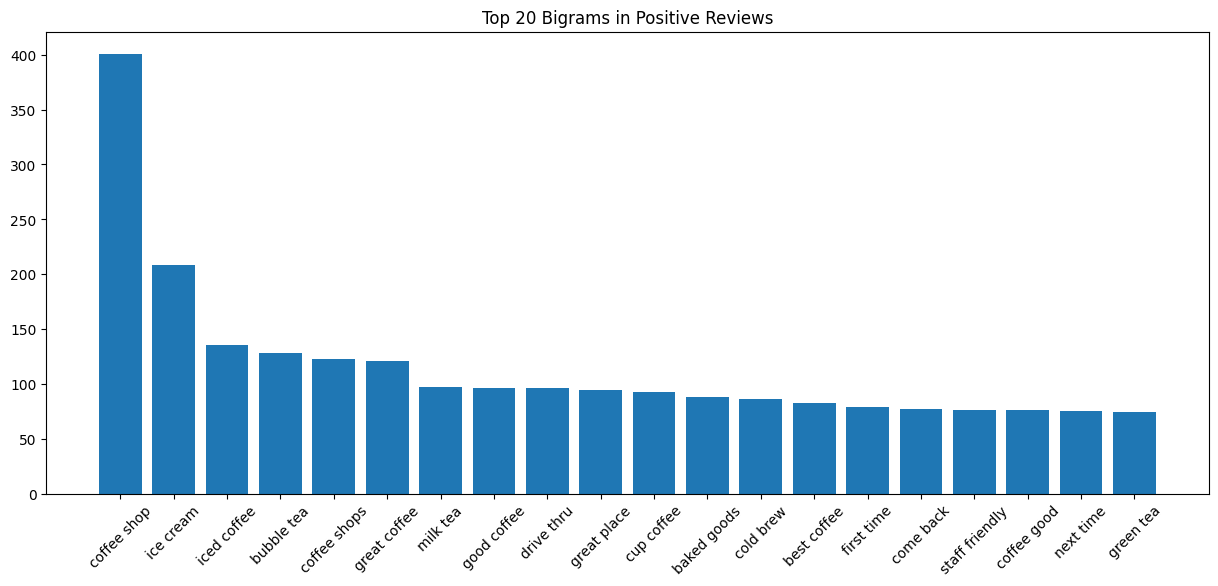

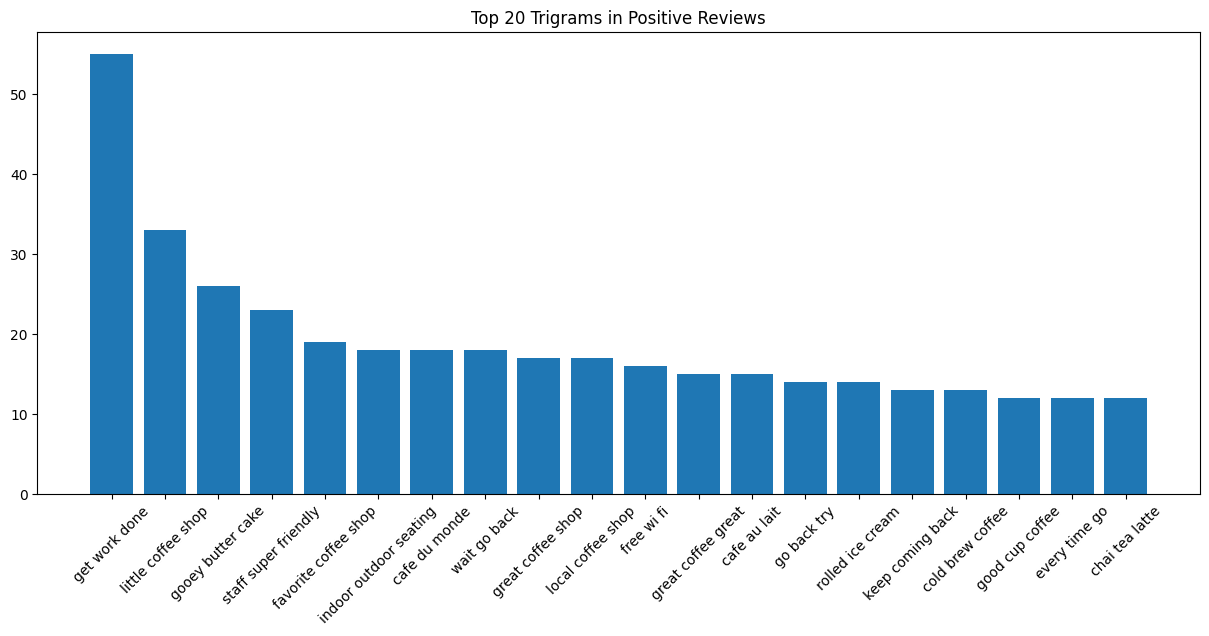

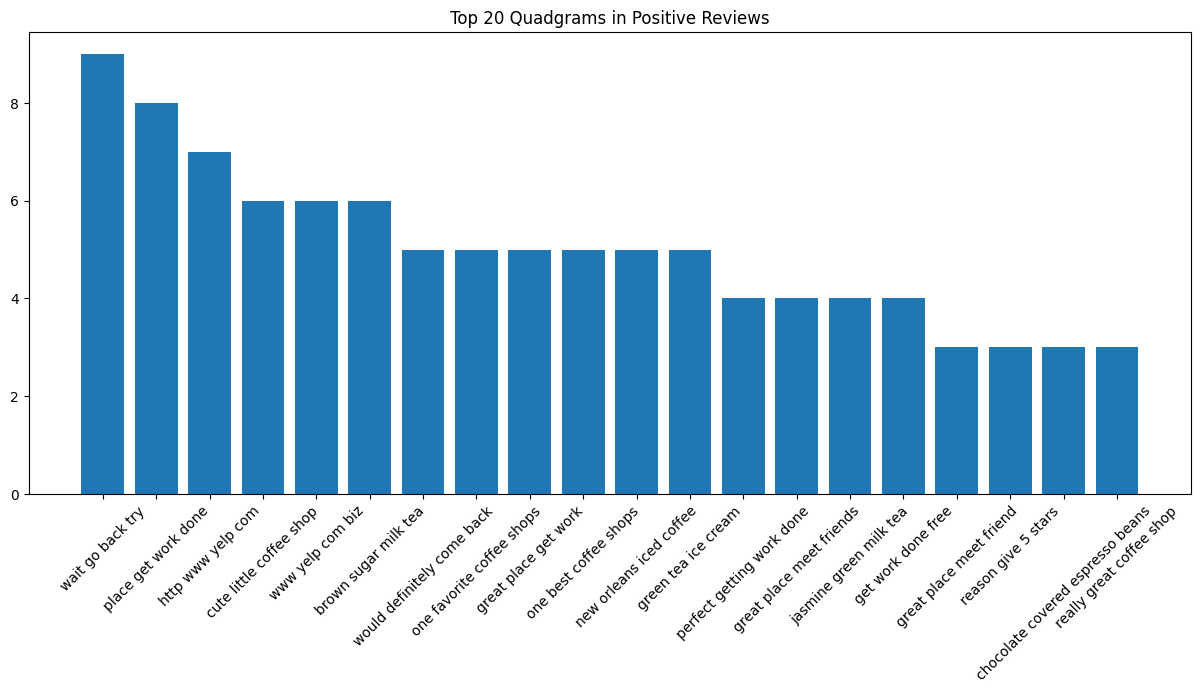

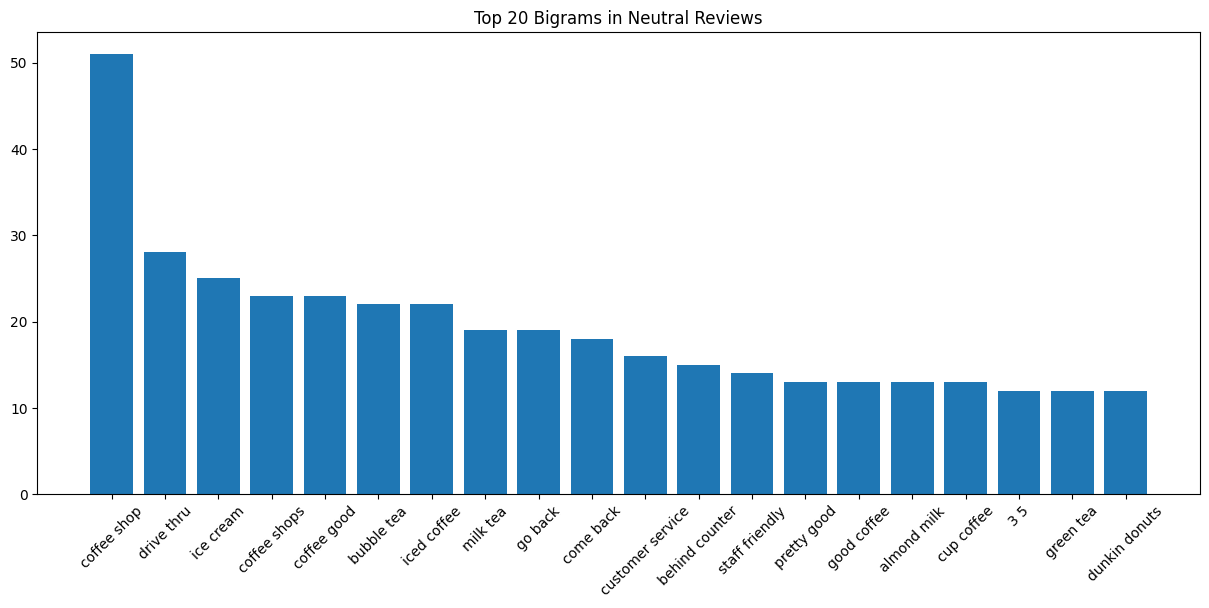

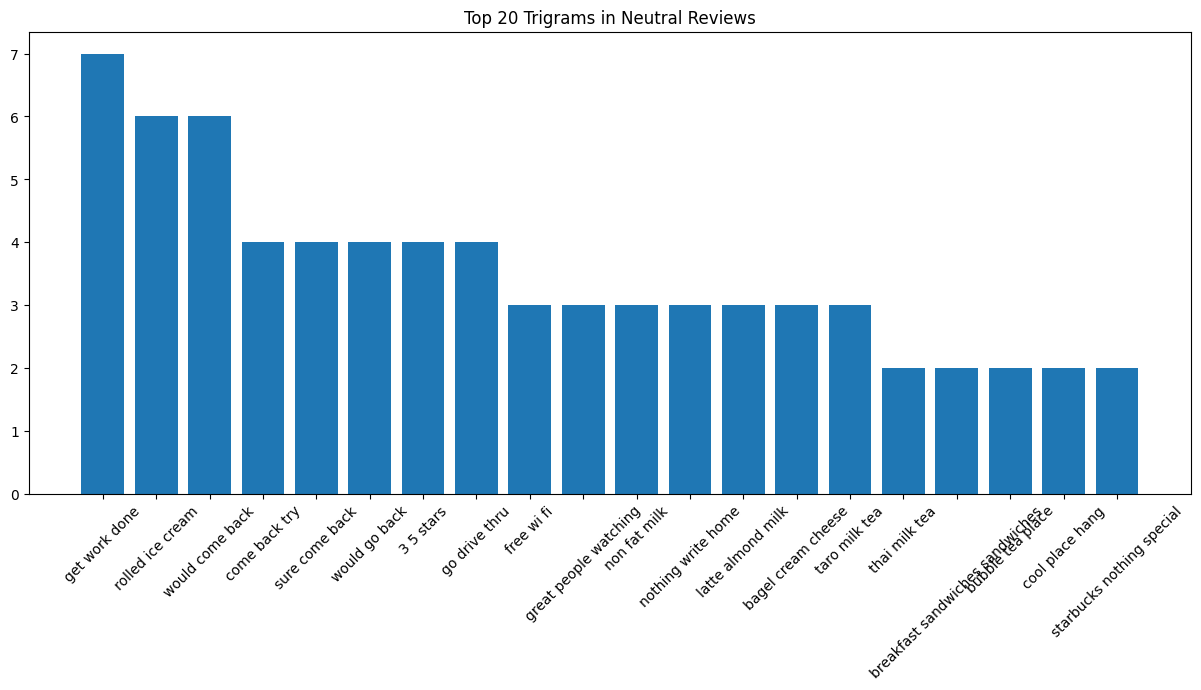

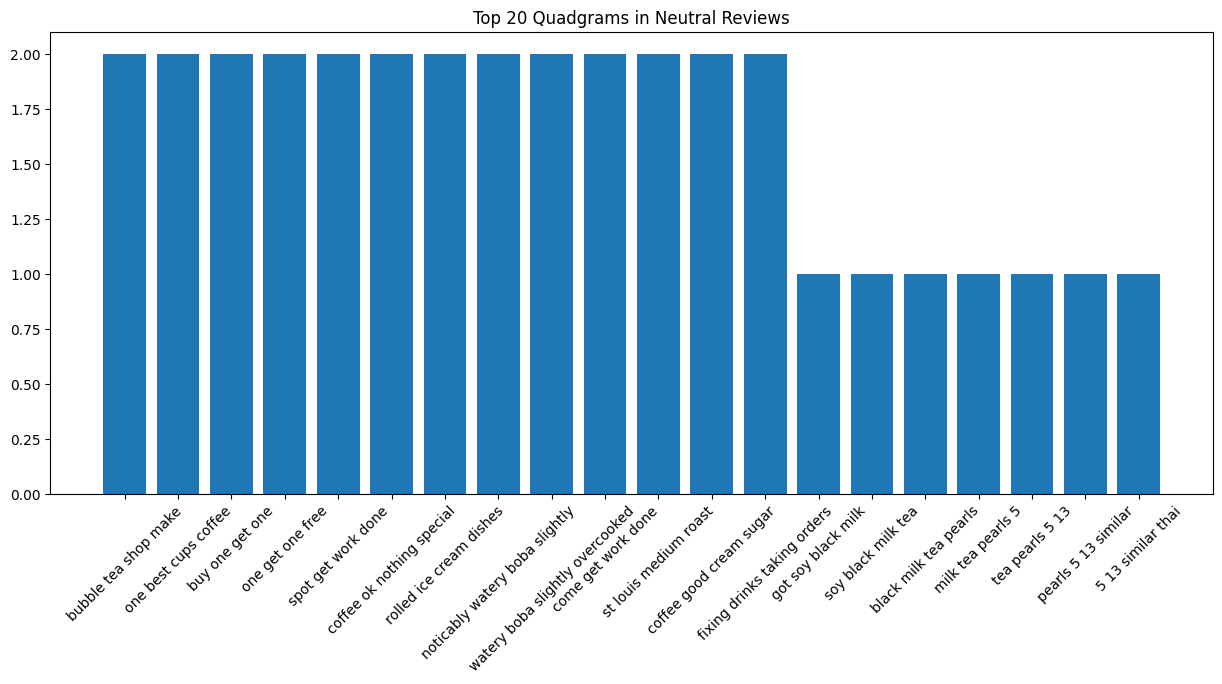

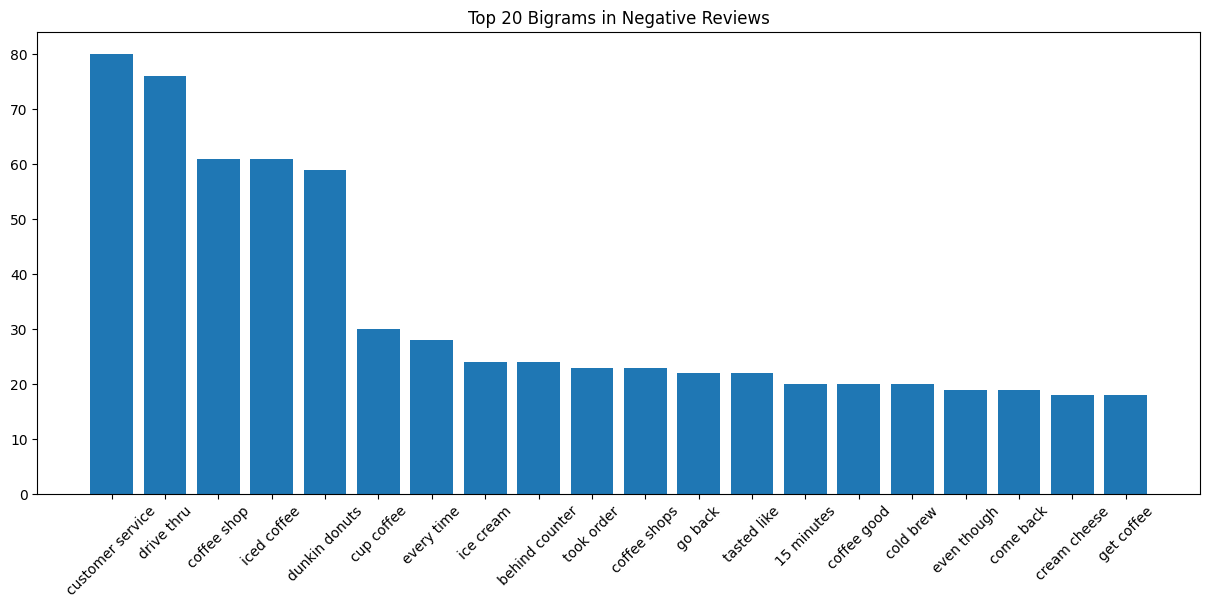

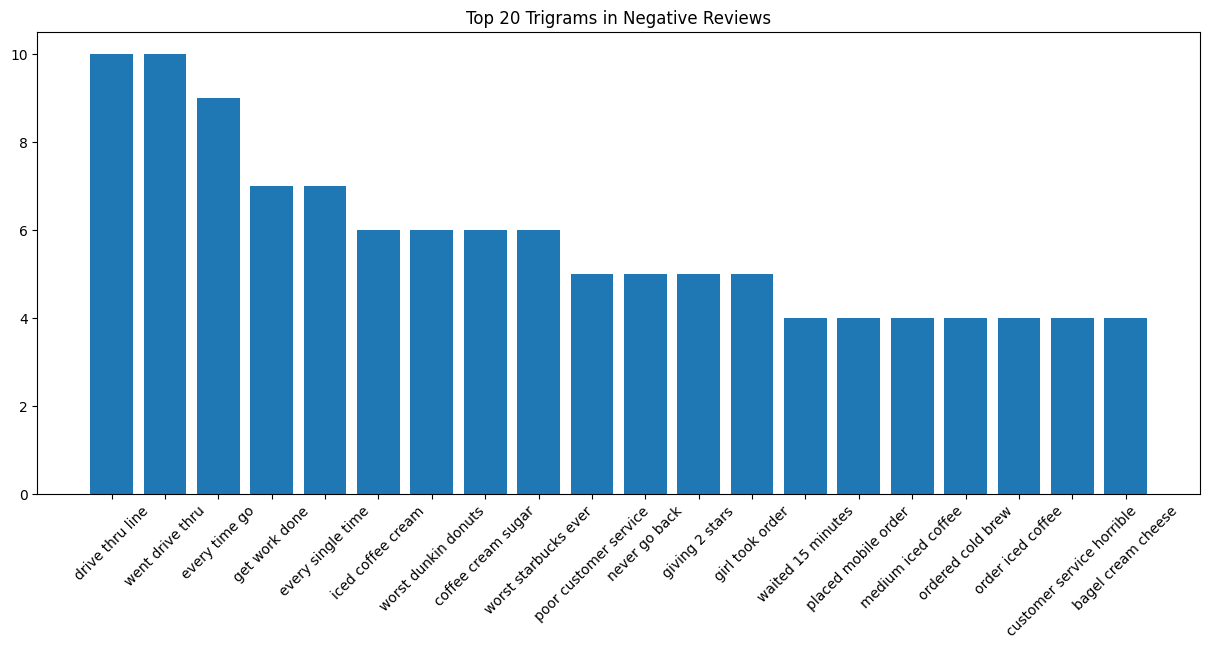

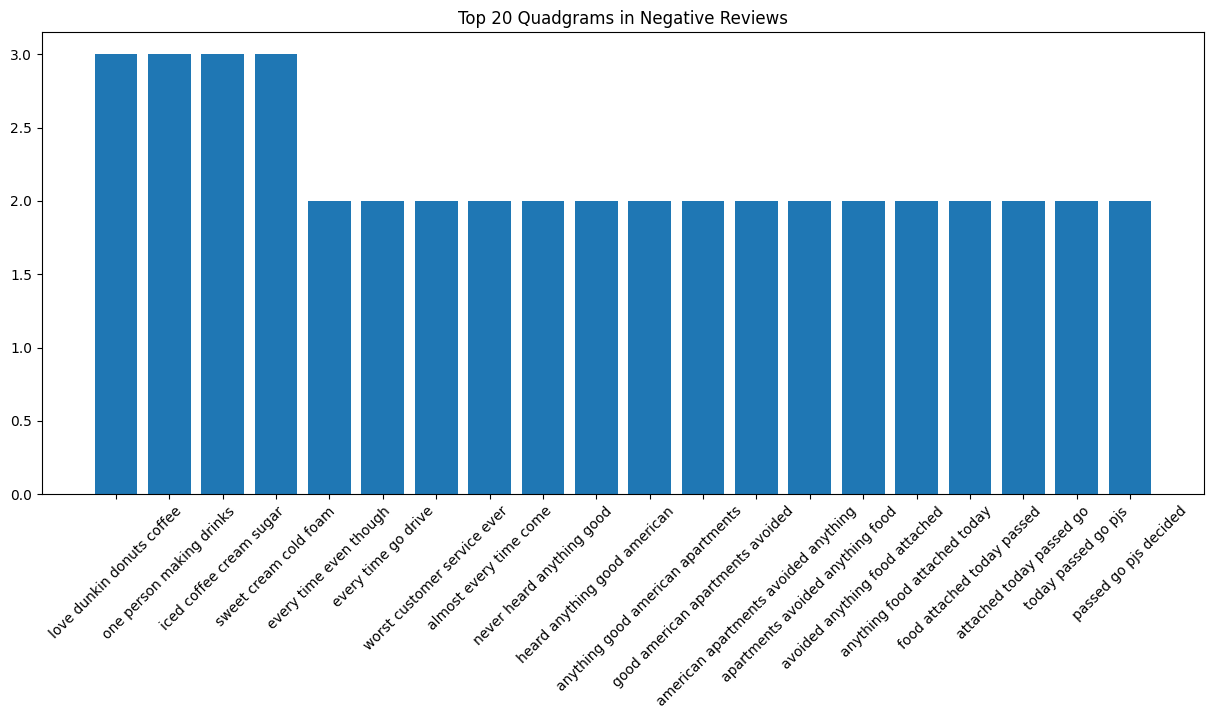

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import bigrams, trigrams, ngrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize a tokenizer that removes punctuation and stop words
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

# Function to tokenize text and extract n-grams, excluding stop words
def get_ngrams(text):
    tokens = [word for word in tokenizer.tokenize(text.lower()) if word not in stop_words]
    return list(bigrams(tokens)), list(trigrams(tokens)), list(ngrams(tokens, 4))


# Categorize reviews
coffee_filtered_df['review_type'] = pd.cut(coffee_filtered_df['stars'], bins=[0, 2, 3, 5], include_lowest=True, labels=['negative', 'neutral', 'positive'])

# Split DataFrame based on review type
positive_reviews = coffee_filtered_df[coffee_filtered_df['review_type'] == 'positive']
neutral_reviews = coffee_filtered_df[coffee_filtered_df['review_type'] == 'neutral']
negative_reviews = coffee_filtered_df[coffee_filtered_df['review_type'] == 'negative']

# Generate n-grams for each review type
positive_reviews['bigrams'], positive_reviews['trigrams'], positive_reviews['quadgrams'] = zip(*positive_reviews['text'].apply(get_ngrams))
neutral_reviews['bigrams'], neutral_reviews['trigrams'], neutral_reviews['quadgrams'] = zip(*neutral_reviews['text'].apply(get_ngrams))
negative_reviews['bigrams'], negative_reviews['trigrams'], negative_reviews['quadgrams'] = zip(*negative_reviews['text'].apply(get_ngrams))

# Function to plot most common n-grams
def plot_ngrams(ngrams_list, title, n=20):
    plt.figure(figsize=(15, 6))  # Set the figure size
    ngram_counts = Counter(ngrams_list)
    common_ngrams = ngram_counts.most_common(n)
    ngrams, counts = zip(*common_ngrams)
    plt.bar(range(n), counts, tick_label=[' '.join(ng) for ng in ngrams])
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Flatten the list of n-grams and plot for each review type
plot_ngrams([bg for bgs in positive_reviews['bigrams'] for bg in bgs], 'Top 20 Bigrams in Positive Reviews')
plot_ngrams([tg for tgs in positive_reviews['trigrams'] for tg in tgs], 'Top 20 Trigrams in Positive Reviews')
plot_ngrams([qg for qgs in positive_reviews['quadgrams'] for qg in qgs], 'Top 20 Quadgrams in Positive Reviews')
plot_ngrams([bg for bgs in neutral_reviews['bigrams'] for bg in bgs], 'Top 20 Bigrams in Neutral Reviews')
plot_ngrams([tg for tgs in neutral_reviews['trigrams'] for tg in tgs], 'Top 20 Trigrams in Neutral Reviews')
plot_ngrams([qg for qgs in neutral_reviews['quadgrams'] for qg in qgs], 'Top 20 Quadgrams in Neutral Reviews')
plot_ngrams([bg for bgs in negative_reviews['bigrams'] for bg in bgs], 'Top 20 Bigrams in Negative Reviews')
plot_ngrams([tg for tgs in negative_reviews['trigrams'] for tg in tgs], 'Top 20 Trigrams in Negative Reviews')
plot_ngrams([qg for qgs in negative_reviews['quadgrams'] for qg in qgs], 'Top 20 Quadgrams in Negative Reviews')
